# K Nearest Neighbors: Predicting King County Housing Prices

<img src="neighbors-talking-over-fence-min.jpg" alt="Drawing" style="width: 700px;"/>

### How would you predict the price of a house that is about to go on sale?

<img src='For-sale-sign.jpg' alt="Drawing" style="width: 800px;"/>

## Similar houses should be similar in price

* Square footage
* Number of floors
* Location


## Distance as a measure of similarity

How 'far away' are houses from each other given all of their features?



## What is K-Nearest Neighbors?

**_K-Nearest Neighbors_** (or KNN, for short) is a supervised learning algorithm that can be used for both **_Classification_** and **_Regression_** tasks. KNN is a distance-based classifier, meaning that it implicitly assumes that the smaller the distance between 2 points, the more similar they are. In KNN, each column acts as a dimension. In a dataset with two columns, we can easily visualize this by treating values for one column as X coordinates and and the other as Y coordinates. Since this is a **_Supervised Learning Algorithm_**, we must also have the labels for each point in our dataset, or else we can't use this algorithm for prediction.

## Fitting the Model

KNN is unique compared to other algorithms in that it does almost nothing during the "fit" step, and all the work during the "predict" step. During the 'fit' step, KNN just stores all the training data and corresponding values. No distances are calculated at this point. 

## Making Predictions with K

All the magic happens during the 'predict' step. During this step, KNN takes a point that we want a class prediction for, and calculates the distances between that point and every single point in the training set. It then finds the `K` closest points, or **_Neighbors_**, and examines the values of each. You can think of each of the K-closest points getting a 'vote' about the predicted value. Often times the mean of all the values is taken to make a prediction about the new point.

In the following animation, K=3.

<img src='knn.gif'>

## Distance Metrics

As we explored in a previous lesson, there are different **_distance metrics_** when using KNN. For KNN, we can use **_Manhattan_**, **_Euclidean_**, or **_Minkowski Distance_**--from an algorithmic standpoint, it doesn't matter which! However, it should be noted that from a practical standpoint, these can affect our results and our overall model performance. 


In [6]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean as euc
import numpy as np
import pandas as pd
np.random.seed(0)

## Fitting and Transforming

Sklearn is one of the most popular ML libraries for python which gives us access to a wealth of different algorthims. All of these algorthims follow the same API

```python
model = model_object()

model.fit()

model.predict()```

In [311]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [300]:
house_data = pd.read_csv('data/kc_house_data.csv')

In [301]:
bottom_5 = np.percentile(house_data['price'], 10)
top_5 = np.percentile(house_data['price'], 90)

house_data = house_data[(house_data['price'] > bottom_5) & (house_data['price'] < top_5)]

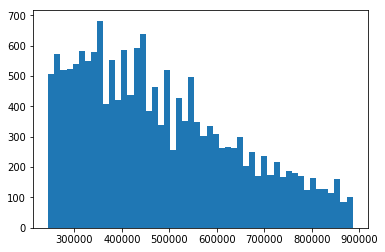

In [402]:
fig, ax = plt.subplots()
ax.hist(house_data['price'], bins=50);

In [360]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
            'condition', 'grade', 'lat', 'long']

X = house_data[features]
y = house_data['price'].values

In [406]:
house_data

(17280, 21)

In [361]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [362]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [275]:
class KNN(object):
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test, k=3, weighted=False):
        predictions = np.zeros(X_test.shape[0])
        
        for i, point in enumerate(X_test):
            distances = self._get_distances(point)
            k_nearest = self._get_k_nearest(distances, k)
            prediction = self._get_predicted_value(k_nearest)
            predictions[i] = prediction
        return predictions
    
    #helper functions
    def _get_distances(self, x):
        '''Take an single point and return an array of distances to every point in our dataset'''
        distances = np.zeros(self.X_train.shape[0])
        for i, point in enumerate(self.X_train):
            distances[i] = euc(x, point)
        return distances
    
    def _get_k_nearest(self, distances, k):
        '''Take in the an array of distances and return indices the k nearest points'''
        nearest = np.argsort(distances)[:k]
        return nearest
    
    def _get_predicted_value(self, k_nearest):
        '''Takes in the indices of the k nearest points and returns the mean of their target values'''
        return np.mean(self.y_train[k_nearest])

In [91]:
knn = KNN()
knn.fit(X_train_scaled, y_train)

In [99]:
preds = knn.predict(X_test_scaled, k=10)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [103]:
from sklearn.neighbors import KNeighborsRegressor

In [369]:
ks = range(1, 30)

test_errors = np.zeros(len(list(ks)))

for i, k in enumerate(ks):
    
    nn = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)

    nn.fit(X_train_scaled, y_train)
    preds = nn.predict(X_test_scaled)
    
    test_errors[i] = np.sqrt(mean_squared_error(y_test, preds))
#     test_errors[i] = cross_val_score(y_test, preds, n_jobs=-1, scoring='')

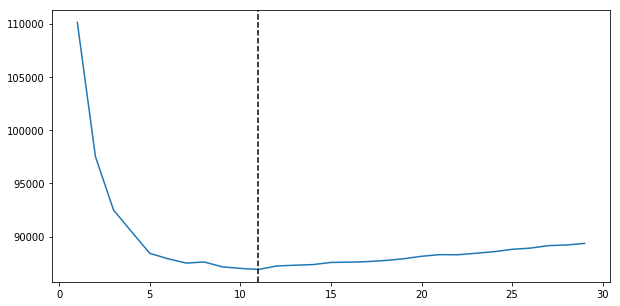

In [370]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(list(ks), test_errors)
ax.axvline(list(ks)[np.argmin(test_errors)], linestyle='--', color='black');

In [371]:
list(ks)[np.argmin(test_errors)]

11

In [373]:
np.min(test_errors)

86919.96604182392

In [374]:
nn = KNeighborsRegressor(n_neighbors=11, n_jobs=-1)

nn.fit(X_train_scaled, y_train)
preds = nn.predict(X_test_scaled)